In [1]:
from torchvision import datasets

In [2]:
data_path = '../dataset'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)

Files already downloaded and verified


In [3]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified


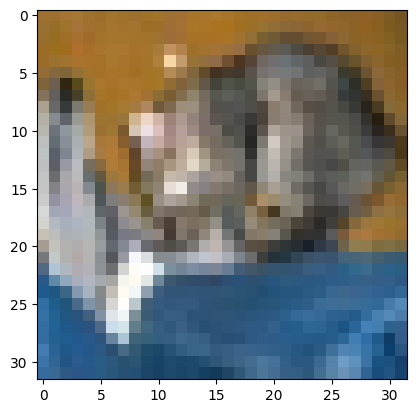

In [7]:
import matplotlib.pyplot as plt

img, label = cifar10[0]
plt.imshow(img)
plt.show()

In [8]:
label

3

In [9]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
tensor = to_tensor(img)
tensor.shape

torch.Size([3, 32, 32])

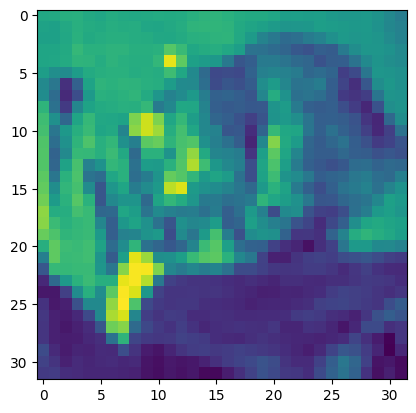

In [10]:
g = tensor[0].detach()
plt.imshow(g)
plt.show()

In [11]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())

In [16]:
import torch


imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape, tensor_cifar10[0][0].shape

(torch.Size([3, 32, 32, 50000]), torch.Size([3, 32, 32]))

In [17]:
import torch

# Create three 1D tensors
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])
z = torch.tensor([7, 8, 9])

stacked = torch.stack([x, y, z], dim = 0).float()
stacked

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [21]:
stacked.mean(), stacked.shape, stacked.mean(dim=0), stacked.mean(dim=1)

(tensor(5.), torch.Size([3, 3]), tensor([4., 5., 6.]), tensor([2., 5., 8.]))

In [22]:
stacked[0], stacked[:, 0]

(tensor([1., 2., 3.]), tensor([1., 4., 7.]))

In [23]:
images_v = imgs.view(3, -1)
images_v.shape, images_v.mean(dim=1), images_v.std(dim=1)

(torch.Size([3, 51200000]),
 tensor([0.4914, 0.4822, 0.4465]),
 tensor([0.2470, 0.2435, 0.2616]))

In [24]:
transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2470, 0.2435, 0.2616])

Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.2435, 0.2616])

In [26]:
transformed_cifar10 = datasets.CIFAR10(
    data_path, 
    train=True, 
    download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))])
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


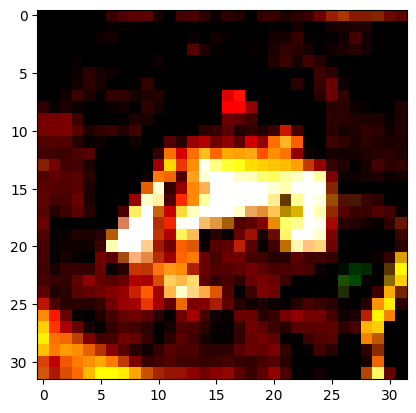

In [27]:
img_t, _ = transformed_cifar10[0]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [28]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

NameError: name 'cifar10_val' is not defined